# The algorithm just below is extracting the maze from the txt file(maze.txt).
# It is not the main algoritm.
# It is just for trial and testing.
# The main algortims are BFS,DFS and UCS.(with Blue Headings)

In [3]:
import queue
import time

def read_maze(filename):
    maze = []
    with open(filename, 'r') as file:
        for line in file:
            maze.append(list(line.strip()))
    return maze

def is_valid_move(maze, x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != '#'

def bfs(maze, start, goal):
    start_x, start_y = start
    goal_x, goal_y = goal
    visited = set()
    q = queue.Queue()
    q.put((start_x, start_y, []))

    while not q.empty():
        x, y, path = q.get()
        if (x, y) == (goal_x, goal_y):
            return path

        if (x, y) in visited:
            continue
        visited.add((x, y))

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if is_valid_move(maze, new_x, new_y):
                q.put((new_x, new_y, path + [(dx, dy)]))

    return None

def print_path(path):
    actions = {
        (0, 1): 'Right',
        (0, -1): 'Left',
        (1, 0): 'Down',
        (-1, 0): 'Up'
    }
    for dx, dy in path:
        print(actions[(dx, dy)], end=' -> ')
    print('Goal')

if __name__ == '__main__':
    maze = read_maze('maze.txt')  # Replace with your maze file name
    start = None
    goal = None

    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == 'S':
                start = (i, j)
            elif maze[i][j] == 'G':
                goal = (i, j)

    if start is None or goal is None:
        print("Start or goal not found in the maze.")
    else:
        start_time = time.time()
        path = bfs(maze, start, goal)
        end_time = time.time()

        if path is None:
            print("No path found from S to G.")
        else:
            print("Path from S to G:")
            print_path(path)
            print("Running time:", end_time - start_time, "seconds")


Path from S to G:
Right -> Right -> Down -> Right -> Right -> Right -> Right -> Down -> Down -> Right -> Down -> Right -> Right -> Right -> Right -> Right -> Right -> Down -> Right -> Goal
Running time: 0.0010063648223876953 seconds


In [8]:
import random
import time
import matplotlib.pyplot as plt
import queue

def generate_maze(size):
    maze = [['*' for _ in range(size)] for _ in range(size)]
    start_x, start_y = random.randint(0, size - 1), random.randint(0, size - 1)
    goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    while (start_x, start_y) == (goal_x, goal_y):
        goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    maze[start_x][start_y] = 'S'
    maze[goal_x][goal_y] = 'G'
    return maze, (start_x, start_y), (goal_x, goal_y)

def is_valid_move(maze, x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != '#'

def bfs(maze, start, goal):
    start_x, start_y = start
    goal_x, goal_y = goal
    visited = set()
    q = queue.Queue()
    q.put((start_x, start_y, []))

    while not q.empty():
        x, y, path = q.get()
        if (x, y) == (goal_x, goal_y):
            return path

        if (x, y) in visited:
            continue
        visited.add((x, y))

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if is_valid_move(maze, new_x, new_y):
                q.put((new_x, new_y, path + [(dx, dy)]))

    return None

def print_path(path):
    actions = {
        (0, 1): 'Right',
        (0, -1): 'Left',
        (1, 0): 'Down',
        (-1, 0): 'Up'
    }
    for dx, dy in path:
        print(actions[(dx, dy)], end=' -> ')
    print('Goal')

if __name__ == '__main__':
    maze , start , goal = generate_maze(20)  # Replace with your maze file name
#     start = None
#     goal = None

    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == 'S':
                start = (i, j)
            elif maze[i][j] == 'G':
                goal = (i, j)

    if start is None or goal is None:
        print("Start or goal not found in the maze.")
    else:
        start_time = time.time()
        path = bfs(maze, start, goal)
        end_time = time.time()

        if path is None:
            print("No path found from S to G.")
        else:
            print("Path from S to G:")
            print_path(path)
            print("Running time:", end_time - start_time, "seconds")


Path from S to G:
Left -> Left -> Left -> Left -> Left -> Left -> Left -> Left -> Left -> Left -> Left -> Left -> Left -> Up -> Up -> Up -> Up -> Up -> Up -> Up -> Up -> Up -> Up -> Goal
Running time: 0.008990764617919922 seconds


   # This is the main code with graph(BFS).

Generated Maze (Size: 11):

* # * * * * # # # * #
# * * # * * # # # * *
# * * # * * * * # * *
# * * # * * * # * * #
# * * * * * * # # # *
* * G * # * * * * # *
* * * # * # # * # * #
* * * * # * * * # # *
* * * # # # * * S * *
# # # # * * * * # * *
* * * * * * * * * * *


Path from S to G:
Left -> Up -> Up -> Up -> Left -> Left -> Up -> Left -> Left -> Left -> Down -> Goal
BFS Running Time (Size 11): 0.000000 seconds

--------------------------------------------------

Generated Maze (Size: 22):

# * * # * * * * * # * # * * * * # * * * * *
# # * * * * * * # * # * # # * * * * # * * *
# # # * # * * * # * * * * * * * * * # # * *
* * * * # * * # * # * * * * * # # * * * # #
* * * * * * * * * # * * * * # # * * * * # *
# * * * * * * * # * * * * * * # # * * * * *
# # * * # * * # * * * * * * # * * # * * * *
# * # * * * * * * * * * # * # * * * * * # *
* * * # * * * # # * * * * * # * * # * * * *
# * * # # * * * * * # # * # # # * * * * * #
# # # # * * * # # * * * * * # # * * * # # #
* * # # * * * #

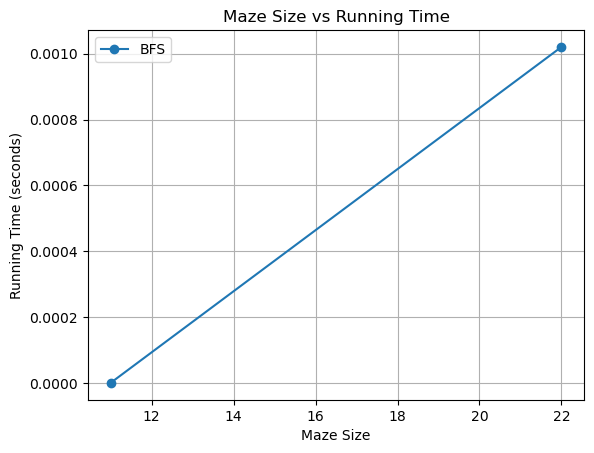

In [37]:
import random
import time
import matplotlib.pyplot as plt
import queue

def generate_maze(size, obstacle_prob):
    maze = [['*' for _ in range(size)] for _ in range(size)]
    start_x, start_y = random.randint(0, size - 1), random.randint(0, size - 1)
    goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    while (start_x, start_y) == (goal_x, goal_y):
        goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    maze[start_x][start_y] = 'S'
    maze[goal_x][goal_y] = 'G'

    for row in maze:
        for j in range(size):
            if row[j] != 'S' and row[j] != 'G' and random.random() < obstacle_prob:
                row[j] = '#'
    
    return maze, (start_x, start_y), (goal_x, goal_y)

def is_valid_move(maze, x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != '#'

def bfs(maze, start, goal):
    # ... (same BFS code as before)
    start_x, start_y = start
    goal_x, goal_y = goal
    visited = set()
    q = queue.Queue()
    q.put((start_x, start_y, []))

    while not q.empty():
        x, y, path = q.get()
        if (x, y) == (goal_x, goal_y):
            return path

        if (x, y) in visited:
            continue
        visited.add((x, y))

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if is_valid_move(maze, new_x, new_y):
                q.put((new_x, new_y, path + [(dx, dy)]))

    return None


def print_path(path):
    actions = {
        (0, 1): 'Right',
        (0, -1): 'Left',
        (1, 0): 'Down',
        (-1, 0): 'Up'
    }
    for dx, dy in path:
        print(actions[(dx, dy)], end=' -> ')
    print('Goal')
    
    
# Create a list of maze sizes
maze_sizes = [11,2]
obstacle_prob = 0.3

# Store the running times for each maze size
bfs_running_times = []

for size in maze_sizes:
    maze, start, goal = generate_maze(size, obstacle_prob)
    
    print(f"Generated Maze (Size: {size}):\n")
    for row in maze:
        print(' '.join(row))
    print("\n")

    start_time = time.time()
    path = bfs(maze, start, goal)
    end_time = time.time()
    if path is None:
        print("No path found from S to G.")
    else:
        print("Path from S to G:")
        print_path(path)
            
    bfs_running_times.append(end_time - start_time)
    
    print(f"BFS Running Time (Size {size}): {end_time - start_time:.6f} seconds\n")
    print("-" * 50 + "\n")

# Plotting the results
plt.plot(maze_sizes, bfs_running_times, marker='o', label='BFS')
plt.xlabel('Maze Size')
plt.ylabel('Running Time (seconds)')
plt.title('Maze Size vs Running Time')
plt.legend()
plt.grid()
plt.show()


   # Below is DFS algorithm.

Generated Maze (Size: 11):

* * # * # * * * # # G
# * * * # * * * # * *
S * * * * * # * # * #
* * * * * * # * * * *
# * * * * # # * * * *
* * # * * # # * # * *
* * * * * * * * * * #
* * * * * * * * * # *
* * * # * # * * # * *
* * # * * * * # # # #
* * * * * * * * # * *


Path from S to G:
Down -> Right -> Up -> Up -> Right -> Down -> Down -> Down -> Left -> Down -> Down -> Down -> Down -> Down -> Down -> Right -> Right -> Up -> Right -> Up -> Up -> Up -> Up -> Up -> Up -> Up -> Right -> Up -> Up -> Right -> Down -> Right -> Down -> Down -> Down -> Down -> Down -> Down -> Right -> Up -> Right -> Up -> Up -> Up -> Up -> Up -> Right -> Up -> Goal
DFS Running Time (Size 11): 0.001019 seconds

--------------------------------------------------

Generated Maze (Size: 22):

* # * * # * * # * * * * # * * * * # * * * *
* * * # * * * * * * # # # * # * # # * * * *
* # * * # # * * # * * * * # # # * * # # * *
* * # # * * * # * # # * * # # * * # * # * *
* # * * * # # * # # * * * # * * * * * * * *
* 

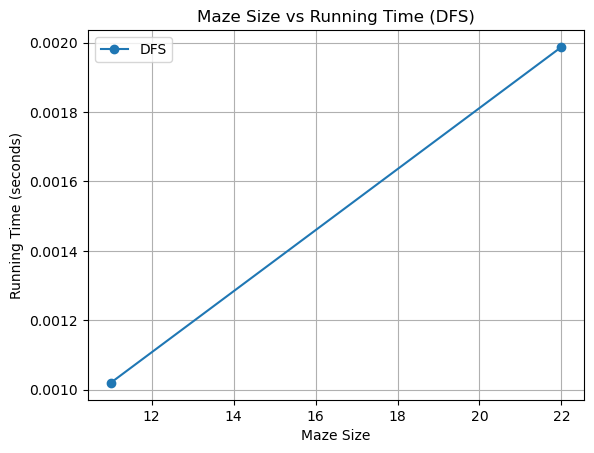

In [35]:
import random
import time
import matplotlib.pyplot as plt

def generate_maze(size, obstacle_prob):
    maze = [['*' for _ in range(size)] for _ in range(size)]
    start_x, start_y = random.randint(0, size - 1), random.randint(0, size - 1)
    goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    while (start_x, start_y) == (goal_x, goal_y):
        goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    maze[start_x][start_y] = 'S'
    maze[goal_x][goal_y] = 'G'

    for row in maze:
        for j in range(size):
            if row[j] != 'S' and row[j] != 'G' and random.random() < obstacle_prob:
                row[j] = '#'
    
    return maze, (start_x, start_y), (goal_x, goal_y)

def is_valid_move(maze, x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != '#'

def dfs(maze, start, goal):
    stack = [(start[0], start[1], [])]
    visited = set()

    while stack:
        x, y, path = stack.pop()

        if (x, y) in visited:
            continue
        visited.add((x, y))

        if (x, y) == goal:
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if is_valid_move(maze, new_x, new_y):
                stack.append((new_x, new_y, path + [(dx, dy)]))

    return None

# Create a list of maze sizes and obstacle probabilities
maze_sizes = [11,22]
obstacle_prob = 0.3

# Store the running times for each maze size
dfs_running_times = []

for size in maze_sizes:
    maze, start, goal = generate_maze(size, obstacle_prob)
    
    print(f"Generated Maze (Size: {size}):\n")
    for row in maze:
        print(' '.join(row))
    print("\n")

    start_time = time.time()
    path = dfs(maze, start, goal)
    end_time = time.time()
    if path is None:
        print("No path found from S to G.")
    else:
        print("Path from S to G:")
        print_path(path)

    dfs_running_times.append(end_time - start_time)

    print(f"DFS Running Time (Size {size}): {end_time - start_time:.6f} seconds\n")
    print("-" * 50 + "\n")

# Plotting the results
plt.plot(maze_sizes, dfs_running_times, marker='o', label='DFS')
plt.xlabel('Maze Size')
plt.ylabel('Running Time (seconds)')
plt.title('Maze Size vs Running Time (DFS)')
plt.legend()
plt.grid()
plt.show()


# Using UCS algorithm(assign random weights to edges)

Generated Maze (Size: 11):

* # # * # * * * # # *
* # * * * # * * * * *
* # * * # * * * * * *
* * # * * * * * # # *
# * * * * * * * * * *
* * * * * * * * # # *
* # * * * # * * * # *
# * * * * G * # * # *
* * # * * # * * * # #
# * * * * * * # * * *
* * S * * * * * # * #


Path from S to G:
Up -> Right -> Up -> Right -> Up -> Right -> Goal
UCS Running Time (Size 11): 0.000000 seconds

--------------------------------------------------

Generated Maze (Size: 22):

* # * # * # * * * * * # * * * * # # * # * *
* # * * * * # * * * * * * * * * * * * # * *
* * * * * # * * * # * # * # * * # # * * * *
* # # * * * * * * # * * # # # * # # * * * *
# * * * * * * * * * * # * * * * * # * * # *
* # # # * * * * * * * * * * # # * * * * # *
* * * * * # * # * * # * # * # * * * * # * #
* * # * * * * # # * # * # * * * * * S * * *
* * * * # * # # # * * * * # * * # # * * * #
* * # * * # * # * # # # # * * # * * * # * #
* * * * * * * * # * * * # * * * * * * * * *
* * * * * * # * * * # * # * * * * * # # * *
* * # 

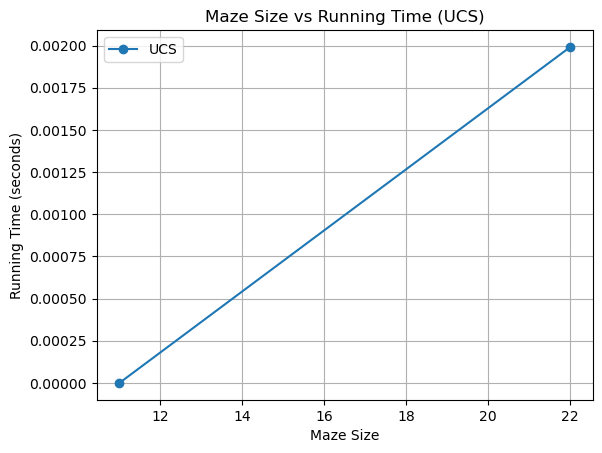

In [41]:
import random
import time
import matplotlib.pyplot as plt
import queue

def generate_maze(size, obstacle_prob):
    maze = [['*' for _ in range(size)] for _ in range(size)]
    start_x, start_y = random.randint(0, size - 1), random.randint(0, size - 1)
    goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    while (start_x, start_y) == (goal_x, goal_y):
        goal_x, goal_y = random.randint(0, size - 1), random.randint(0, size - 1)

    maze[start_x][start_y] = 'S'
    maze[goal_x][goal_y] = 'G'

    for row in maze:
        for j in range(size):
            if row[j] != 'S' and row[j] != 'G' and random.random() < obstacle_prob:
                row[j] = '#'
    
    return maze, (start_x, start_y), (goal_x, goal_y)

def is_valid_move(maze, x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != '#'

def ucs(maze, start, goal):
    pq = queue.PriorityQueue()
    pq.put((0, start[0], start[1], []))
    visited = set()

    while not pq.empty():
        cost, x, y, path = pq.get()

        if (x, y) == goal:
            return path

        if (x, y) in visited:
            continue
        visited.add((x, y))

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            if is_valid_move(maze, new_x, new_y):
                edge_weight = random.randint(1, 10)  # Random edge weight
                pq.put((cost + edge_weight, new_x, new_y, path + [(dx, dy)]))

    return None

# Create a list of maze sizes and obstacle probabilities
maze_sizes = [11,22]
obstacle_prob = 0.3

# Store the running times for each maze size
ucs_running_times = []

for size in maze_sizes:
    maze, start, goal = generate_maze(size, obstacle_prob)
    
    print(f"Generated Maze (Size: {size}):\n")
    for row in maze:
        print(' '.join(row))
    print("\n")

    start_time = time.time()
    path = ucs(maze, start, goal)
    end_time = time.time()
    if path is None:
        print("No path found from S to G.")
    else:
        print("Path from S to G:")
        print_path(path)

    ucs_running_times.append(end_time - start_time)

    print(f"UCS Running Time (Size {size}): {end_time - start_time:.6f} seconds\n")
    print("-" * 50 + "\n")

# Plotting the results
plt.plot(maze_sizes, ucs_running_times, marker='o', label='UCS')
plt.xlabel('Maze Size')
plt.ylabel('Running Time (seconds)')
plt.title('Maze Size vs Running Time (UCS)')
plt.legend()
plt.grid()
plt.show()


# So, we conclude that BFS algorithm is fastest for finding the shortest path and is fastest algorithm in this case.